# Problem 1

### part a

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def f(x):
    # Define the function you want to optimize
    return x[0]**2 + x[1]**2

def gradient_f(x):
    # Compute the gradient of the function at point x
    return np.array([2 * x[0], 2 * x[1]])

def gradient_descent(initial_x, learning_rate, num_iterations):
    x = initial_x

    for i in range(num_iterations):
        gradient = gradient_f(x)
        x = x - learning_rate * gradient

    return x

# Set the initial point and learning rate
initial_point = np.array([1.0, 1.0])
learning_rate = 0.1
num_iterations = 100

# Run gradient descent
optimized_point = gradient_descent(initial_point, learning_rate, num_iterations)

print("Optimized point:", optimized_point)
print("Optimized function value:", f(optimized_point))


Optimized point: [2.03703598e-10 2.03703598e-10]
Optimized function value: 8.299031137761999e-20


### part b

In [4]:
import pdb

def f(x):
    # Define the function you want to optimize
    return x[0]**2 + x[1]**2

def gradient_momentum_f(x, learning_momentum, v):
    # Compute the gradient with the learning momentum
    return np.array([2 * x[0] - learning_momentum * 2 * v[0], 2 * x[1] - learning_momentum * 2 * v[1]])

def gradient_descent_momentum(initial_x, learning_rate, learning_momentum, num_iterations):
    x = initial_x
    v = initial_x

    for i in range(num_iterations):
        gradient = gradient_momentum_f(x, learning_momentum, v)
        v = (learning_momentum * v) + (learning_rate * gradient)
        x = x - v
    return x

# Set the initial point and learning rate
initial_point = np.array([1.0, 1.0])
learning_rate = 0.1
learning_momentum = 0.5
num_iterations = 100

# Run gradient descent
optimized_point = gradient_descent_momentum(initial_point, learning_rate, learning_momentum, num_iterations)

print("Optimized point:", optimized_point)
print("Optimized function value:", f(optimized_point))


Optimized point: [4.70882387e-22 4.70882387e-22]
Optimized function value: 4.434604456688442e-43


### part c

Optimized point (standard): [2.03703598e-10 2.03703598e-10]
Optimized function value (standard): 8.299031137761999e-20
Optimized point (momentum): [4.70882387e-22 4.70882387e-22]
Optimized function value (momentum): 4.434604456688442e-43
Optimized point (momentum): [-2.2258194e-06 -2.2258194e-06]
Optimized function value (momentum): 9.908543958645736e-12


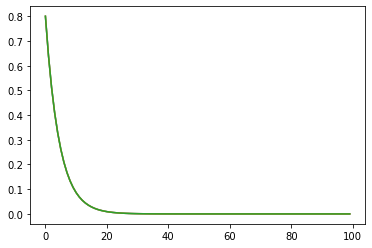

In [19]:
### FUNCTION 1
import pdb

def f1(fx):
    # Define the first function you want to optimize
    x = fx[0]
    y = fx[1]
    return x**2 + y**2

def gradient_f1(fx):
    # Compute the gradient of the function at point x
    x = fx[0]
    y = fx[1]
    return np.array([2 * x, 2 * y])

def gradient_momentum_f1(fx, learning_momentum, v):
    # Compute the gradient with the learning momentum
    x = fx[0]
    y = fx[1]
    return np.array([2 * x - learning_momentum * 2 * v[0], 2 * y - learning_momentum * 2 * v[1]])

def gradient_descent(initial_x, learning_rate, num_iterations):
    x = initial_x
    
    y_actual = np.array([0]*num_iterations)
    y_pred = []
    steps = []
    
    for i in range(num_iterations):
        gradient = gradient_f1(x)
        x = x - learning_rate * gradient
        # pdb.set_trace()
        
        y_pred.append(x[0]) 
        steps.append(i)
        
    steps = np.array(steps)
    error = np.array([y_pred[i] - y_actual[i] for i in range(len(y_pred))])
    y_pred = np.array(y_pred)
    # plt.plot(steps, error)
    return [x, steps, error]

def gradient_descent_momentum(initial_x, learning_rate, learning_momentum, num_iterations):
    x = initial_x
    v = initial_x

    y_actual = np.array([0]*num_iterations)
    y_pred = []
    steps = []
    
    for i in range(num_iterations):
        gradient = gradient_momentum_f1(x, learning_momentum, v)
        v = (learning_momentum * v) + (learning_rate * gradient)
        x = x - v
        # print("iteration " + str(i))
        # pdb.set_trace()
        
        y_pred.append(x[0]) 
        steps.append(i)
        
    steps = np.array(steps)
    error = np.array([y_pred[i] - y_actual[i] for i in range(len(y_pred))])
    y_pred = np.array(y_pred)
    return [x, steps, error]

def gradient_descent_varying(initial_x, learning_rate, num_iterations):
    x = initial_x
    v = initial_x
    
    y_actual = np.array([0]*num_iterations)
    y_pred = []
    steps = []

    for i in range(num_iterations):
        learning_momentum = (i+1)/(i+2)
        gradient = gradient_momentum_f1(x, learning_momentum, v)
        v = (learning_momentum * v) + (learning_rate * gradient)
        x = x - v
        # print("iteration " + str(i))
        # pdb.set_trace()
        
        y_pred.append(x[0]) 
        steps.append(i)
        
    steps = np.array(steps)
    error = np.array([y_pred[i] - y_actual[i] for i in range(len(y_pred))])
    y_pred = np.array(y_pred)
    return [x, steps, error]

# Set the initial point and learning rate
initial_point = np.array([1.0, 1.0])
learning_rate = 0.1
learning_momentum = 0.5
num_iterations = 100

# Run gradient descent
optimized_point = gradient_descent(initial_point, learning_rate, num_iterations)[0]
steps, error = gradient_descent(initial_point, learning_rate, num_iterations)[1:3]

print("Optimized point (standard):", optimized_point)
print("Optimized function value (standard):", f1(optimized_point))

optimized_point = gradient_descent_momentum(initial_point, learning_rate, learning_momentum, num_iterations)[0]
steps_momentum, error_momentum = gradient_descent(initial_point, learning_rate, num_iterations)[1:3]
print("Optimized point (momentum):", optimized_point)
print("Optimized function value (momentum):", f1(optimized_point))

optimized_point = gradient_descent_varying(initial_point, learning_rate, num_iterations)[0]
steps_varying, error_varying = gradient_descent(initial_point, learning_rate, num_iterations)[1:3]
print("Optimized point (momentum):", optimized_point)
print("Optimized function value (momentum):", f1(optimized_point))

plt.plot(steps, error, steps, error_momentum, steps, error_varying)

Optimized point (standard): [1.47257713 2.16768049]
Optimized function value (standard): 0.22339360489202056
Optimized point (momentum): [1.69092511 2.8612798 ]
Optimized function value (momentum): 0.4777986064176193
Optimized point (momentum): [0.08546917 0.00728141]
Optimized function value (momentum): 0.8363666990312171


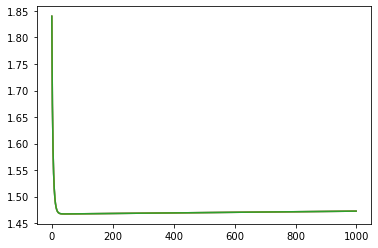

In [30]:
### FUNCTION 2
import pdb
import numpy as np

def f2(fx):
    # Define the second function to optimize
    x = fx[0]
    y = fx[1]
    f = (1-x)**2 + (100 * (y - x**2)**2)
    return f

def gradient_f2(fx):
    # Compute the gradient of the function at point x
    x = fx[0]
    y = fx[1]
    dfdx = (400 * x**3) + x - (400 * x * y) - 2
    dfdy = (200 * y) - (200 * x**2)
    return np.array([dfdx, dfdy])

def gradient_momentum_f2(fx, learning_momentum, v):
    # Compute the gradient of with learning momentum
    x = fx[0]
    y = fx[1]
    dfdx = (400 * x**3) + x - (400 * x * y) - 2
    dfdy = (200 * y) - (200 * x**2)

    u = v[0]
    w = v[1]
    dvdu = (400 * u**3) + u - (400 * u * w) - 2
    dvdw = (200 * w) - (200 * u**2)
    return np.array([dfdx - learning_momentum * dvdu, dfdy - learning_momentum * dvdw])

def gradient_descent(initial_x, learning_rate, num_iterations):
    x = initial_x

    y_actual = np.array([0]*num_iterations)
    y_pred = []
    steps = []
    
    for i in range(num_iterations):
        gradient = gradient_f2(x)
        x = x - learning_rate * gradient
        # print("base")
        # pdb.set_trace()
    
        y_pred.append(x[0]) 
        steps.append(i)
        
    steps = np.array(steps)
    error = np.array([y_pred[i] - y_actual[i] for i in range(len(y_pred))])
    y_pred = np.array(y_pred)
    return [x, steps, error]
    

def gradient_descent_momentum(initial_x, learning_rate, learning_momentum, num_iterations):
    x = initial_x
    v = initial_x

    y_actual = np.array([0]*num_iterations)
    y_pred = []
    steps = []
    
    for i in range(num_iterations):
        gradient = gradient_momentum_f2(x, learning_momentum, v)
        v = (learning_momentum * v) + (learning_rate * gradient)
        x = x - v
        # print("iteration " + str(i))
        # print("momentum")
        #pdb.set_trace()
    
        y_pred.append(x[0]) 
        steps.append(i)
        
    steps = np.array(steps)
    error = np.array([y_pred[i] - y_actual[i] for i in range(len(y_pred))])
    y_pred = np.array(y_pred)
    return [x, steps, error]

def gradient_descent_varying(initial_x, learning_rate, num_iterations):
    x = initial_x
    v = initial_x

    y_actual = np.array([0]*num_iterations)
    y_pred = []
    steps = []
    
    for i in range(num_iterations):
        learning_momentum = (i+1)/(i+2)
        gradient = gradient_momentum_f2(x, learning_momentum, v)
        v = (learning_momentum * v) + (learning_rate * gradient)
        x = x - v
        # print("iteration " + str(i))
        # print("varying")
        #pdb.set_trace()
        
        y_pred.append(x[0]) 
        steps.append(i)
    
    steps = np.array(steps)
    error = np.array([y_pred[i] - y_actual[i] for i in range(len(y_pred))])
    y_pred = np.array(y_pred)
    return [x, steps, error]

# Set the initial point and learning rate
initial_point = np.array([2.0, 2.0])
learning_rate = 0.0001
learning_momentum = 0.9
num_iterations = 1000

# Run gradient descent
optimized_point = gradient_descent(initial_point, learning_rate, num_iterations)[0]
steps, error = gradient_descent(initial_point, learning_rate, num_iterations)[1:3]
print("Optimized point (standard):", optimized_point)
print("Optimized function value (standard):", f2(optimized_point))

optimized_point = gradient_descent_momentum(initial_point, learning_rate, learning_momentum, num_iterations)[0]
steps_momentum, error_momentum = gradient_descent(initial_point, learning_rate, num_iterations)[1:3]
print("Optimized point (momentum):", optimized_point)
print("Optimized function value (momentum):", f2(optimized_point))

optimized_point = gradient_descent_varying(initial_point, learning_rate, num_iterations)[0]
steps_varying, error_varying = gradient_descent(initial_point, learning_rate, num_iterations)[1:3]
print("Optimized point (momentum):", optimized_point)
print("Optimized function value (momentum):", f2(optimized_point))

plt.plot(steps, error, steps, error_momentum, steps, error_varying)
#plt.plot(steps, error)
#plt.plot(steps, error_momentum)
#plt.plot(steps, error_varying)

# Problem 2

In [ ]:
### IMPORTS
from sklearn.datasets import fetch_openml

import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
### FETCH DATA, ASSIGN VARS

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

X,y = mnist["data"], mnist["target"]
X = np.array(X)
some_digit = X[0]

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Our 3 classifiers:
1. OvA
2. Random Forest
3. KNeighbors (probably will work best)

## One vs. All (OvA)

In [ ]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

some_digit_scores = sgd_clf.decision_function([some_digit])

y_train_ova_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=5)
f1_score(y_train, y_train_ova_pred, average="macro")

0.8780295041097735

The One vs. All classifier was the slowest and least accurate of the 3 classifiers we chose. It took 16 minutes to produce an f1 score of 87%.

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

forest_clf.predict_proba([some_digit])

y_train_forest_pred = cross_val_predict(forest_clf, X_train, y_train, cv=5)
f1_score(y_train, y_train_forest_pred, average="macro")

0.9661919580821857

The Random Forest classifier and the K Neighbors classifier scored very similarly, but because it's more difficult to tune the hyperparameters for this classifier, it is not the best one of the 3 we chose.

## K Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

knn_clf.predict([some_digit])


y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=5)
f1_score(y_multilabel, y_train_knn_pred, average="macro")



### TEST

y_test_large = (y_test >= 7)
y_test_odd = (y_test % 2 == 1)
y_multilabel_test = np.c_[y_test_large, y_test_odd]

y_test_knn_pred = cross_val_predict(knn_clf, X_test, y_multilabel_test, cv=5)
f1_score(y_multilabel_test, y_test_knn_pred, average="macro")

0.9625164092416195

The K Nearest Neighbors classifier is the best of the 3 classifiers we chose. While it performed very similarly to the Random Forest classifier in this example, further tuning of hyperparameters would improve its performance even more.